<a href="https://colab.research.google.com/github/HelloMrAman/Backend-Project/blob/main/personal_finances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date              0
Mode              0
Category          0
Sub category      0
Income/Expense    0
Debit/Credit      0
Income            0
Expense           0
Debit             0
Credit            0
dtype: int64
        Date                  Mode        Category Sub category  \
0 2021-01-01  CUB - online payment       Allowance     From dad   
1 2021-01-01  CUB - online payment            Food       Snacks   
2 2021-01-03  CUB - online payment           Other     From dad   
3 2021-01-03  CUB - online payment       Household       Stuffs   
4 2021-01-03  CUB - online payment  Transportation        Metro   

  Income/Expense  Debit/Credit  Income  Expense  Debit  Credit  
0         Income        8000.0  8000.0     -0.0    0.0  8000.0  
1        Expense          85.0     0.0    -85.0    0.0    85.0  
2         Income         500.0   500.0     -0.0    0.0   500.0  
3        Expense        6667.0     0.0  -6667.0    0.0  6667.0  
4        Expense          30.0     0.0    -30.0    0.0    3

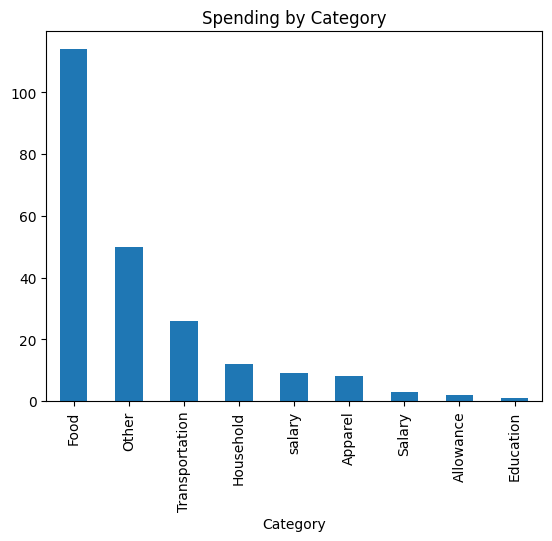

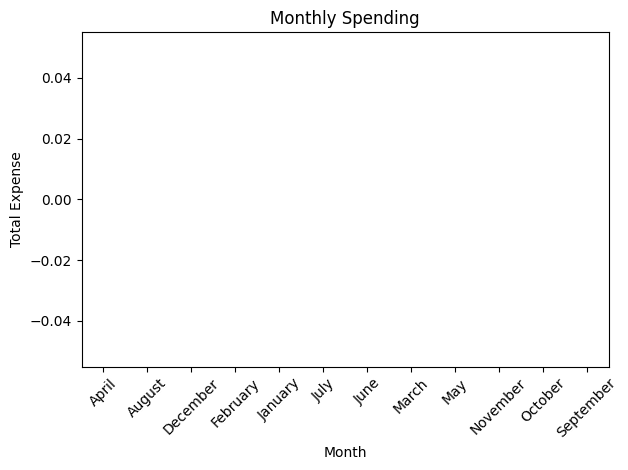

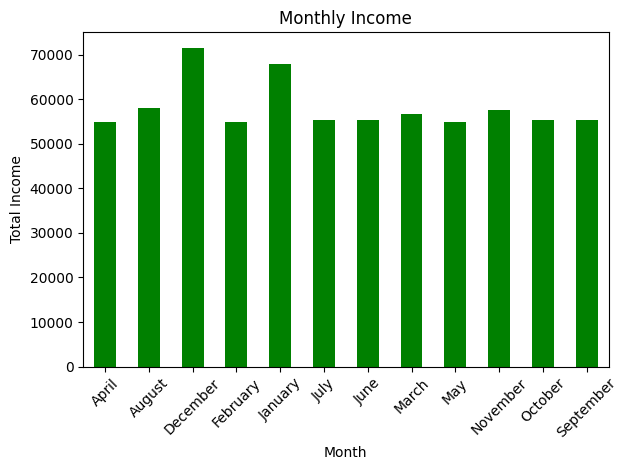

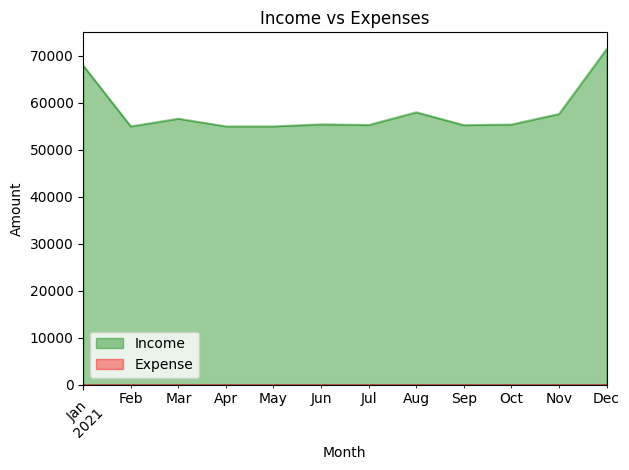

Total Income: ₹698147.00
Total Expenses: ₹0.00
Total Savings: ₹698147.00
Savings Rate: 100.00%


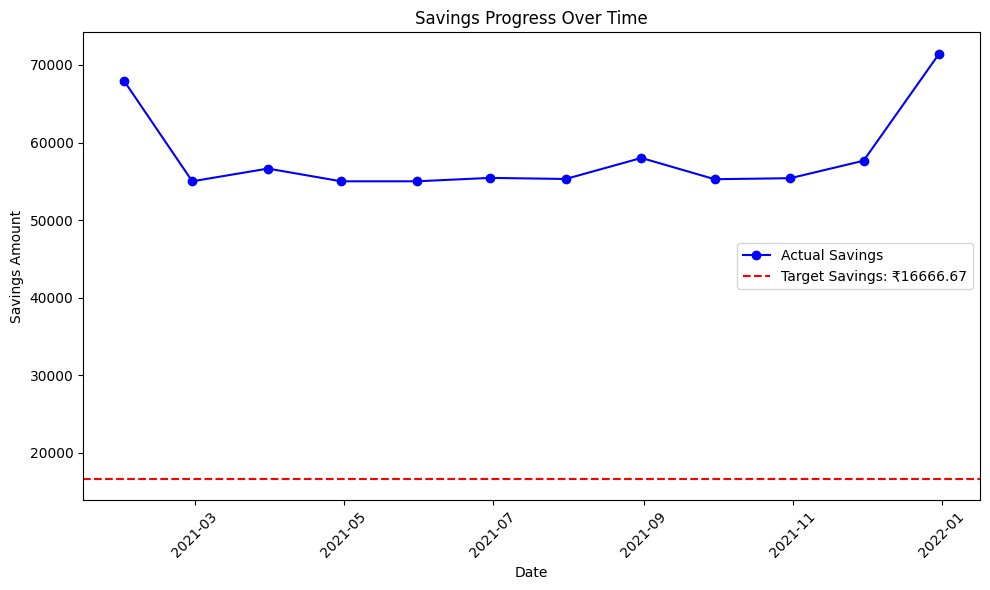

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/sample_data/finance_data.csv')

# Rename columns for convenience
data.rename(columns={'Date / Time': 'Date'}, inplace=True)

# Convert 'Date' to DateTime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Separate Income and Expense columns based on 'Income/Expense' type
data['Income'] = data['Debit/Credit'] * (data['Income/Expense'] == 'Income')
data['Expense'] = data['Debit/Credit'] * (data['Income/Expense'] == 'Expense') * -1

# Separate Debit and Credit columns for easy calculations
data['Debit'] = data['Debit/Credit'] * (data['Debit/Credit'] < 0)
data['Credit'] = data['Debit/Credit'] * (data['Debit/Credit'] >= 0)

# Check for any null values in the 'Date' column after conversion
print(data.isnull().sum())

# Display first few rows
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Data Analysis
print(data.describe())
print(data['Category'].value_counts())

# Spending by Category
data['Category'].value_counts().plot(kind='bar')
plt.title('Spending by Category')
plt.show()

# Monthly Spending Analysis
expenses = data[data['Income/Expense'] == 'Expense']

# Convert 'Date' to DateTime and extract the month name
expenses = expenses.assign(Date=pd.to_datetime(expenses['Date'], format='%Y-%m-%d'))
expenses = expenses.assign(Month=expenses['Date'].dt.month_name())

# Group by month and calculate total expenses
monthly_spending = expenses.groupby('Month')['Debit'].sum() * -1

monthly_spending.plot(kind='bar', color='red')
plt.title('Monthly Spending')
plt.xlabel('Month')
plt.ylabel('Total Expense')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Earning Analysis
incomes = data[data['Income/Expense'] == 'Income']

# Convert 'Date' to DateTime and extract the month name
incomes = incomes.assign(Date=pd.to_datetime(incomes['Date'], format='%Y-%m-%d'))
incomes = incomes.assign(Month=incomes['Date'].dt.month_name())

# Group by month and calculate total incomes
monthly_Earning = incomes.groupby('Month')['Credit'].sum()

monthly_Earning.plot(kind='bar', color='green')
plt.title('Monthly Income')
plt.xlabel('Month')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Income Vs Expenses Over Time - Area Chart
incomes.set_index('Date', inplace=True)
expenses.set_index('Date', inplace=True)

# Resample to monthly data
incomes_resampled = incomes.resample('ME')['Credit'].sum()
expenses_resampled = expenses.resample('ME')['Debit'].sum() * -1

# Filter to the current year
year_income = incomes_resampled.loc[incomes_resampled.index.year == incomes_resampled.index[-1].year]
year_expense = expenses_resampled.loc[expenses_resampled.index.year == expenses_resampled.index[-1].year]

# Plot Income vs Expenses as an area chart
fig, ax = plt.subplots()
year_income.plot(kind='area', alpha=0.4, color='green', label='Income', ax=ax)
year_expense.plot(kind='area', alpha=0.4, color='red', label='Expense', ax=ax)

plt.title('Income vs Expenses')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Budgeting and Goal Setting - Saving Rate Calculation
monthly_income_df = incomes_resampled.to_frame('Credit')
monthly_expense_df = expenses_resampled.to_frame('Debit')

# Merge to calculate savings
monthly_data = monthly_income_df.merge(monthly_expense_df, how='left', on='Date')
monthly_data['Savings'] = monthly_data['Credit'] - monthly_data['Debit']

# Total income, expenses, and savings
total_income = monthly_data['Credit'].sum()
total_expenses = monthly_data['Debit'].sum()
total_savings = monthly_data['Savings'].sum()

# Calculate savings rate
savings_rate = (total_savings / total_income) * 100 if total_income != 0 else 0

print(f"Total Income: ₹{total_income:.2f}")
print(f"Total Expenses: ₹{total_expenses:.2f}")
print(f"Total Savings: ₹{total_savings:.2f}")
print(f"Savings Rate: {savings_rate:.2f}%")

# Financial Goal Setting
goal_amnt = 100000  # Example goal amount (e.g., for a vacation)
target_months = 6

# Calculate monthly savings needed to reach the goal
monthly_savings_needed = goal_amnt / target_months

# Plotting Monthly Savings Progress
monthly_data = monthly_data.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Date'], monthly_data['Savings'], marker='o', color='blue', label='Actual Savings')
plt.axhline(y=monthly_savings_needed, color='red', linestyle='--', label=f'Target Savings: ₹{monthly_savings_needed:.2f}')
plt.title('Savings Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Savings Amount')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()